In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [10]:
dataset = pd.read_csv('/kaggle/input/fashion-images/data/fashion.csv')
dataset.head(10)

,ProductId,Gender,Category,SubCategory,ProductType,Colour,Usage,ProductTitle,Image,ImageURL
0,42419,Girls,Apparel,Topwear,Tops,White,Casual,Gini and Jony Girls Knit White Top,42419.jpg,http://assets.myntassets.com/v1/images/style/p...
1,34009,Girls,Apparel,Topwear,Tops,Black,Casual,Gini and Jony Girls Black Top,34009.jpg,http://assets.myntassets.com/v1/images/style/p...
2,40143,Girls,Apparel,Topwear,Tops,Blue,Casual,Gini and Jony Girls Pretty Blossom Blue Top,40143.jpg,http://assets.myntassets.com/v1/images/style/p...
3,23623,Girls,Apparel,Topwear,Tops,Pink,Casual,Doodle Kids Girls Pink I love Shopping Top,23623.jpg,http://assets.myntassets.com/v1/images/style/p...
4,47154,Girls,Apparel,Bottomwear,Capris,Black,Casual,Gini and Jony Girls Black Capris,47154.jpg,http://assets.myntassets.com/v1/images/style/p...
5,25520,Girls,Apparel,Topwear,Tops,White,Casual,Doodle Kids Girls City Chic White Top,25520.jpg,http://assets.myntassets.com/v1/images/style/p...
6,31120,Girls,Apparel,Topwear,Tops,Pink,Casual,Palm Tree Girls Pink Top,31120.jpg,http://assets.myntassets.com/v1/images/style/p...
7,31118,Girls,Apparel,Topwear,Tops,Red,Casual,Gini and Jony Girls Red Top,31118.jpg,http://assets.myntassets.com/v1/images/style/p...
8,54923,Girls,Apparel,Bottomwear,Capris,Olive,Casual,Do u speak Green Girls Olive 3/4 Pant,54923.jpg,http://assets.myntassets.com/v1/images/style/p...
9,31127,Girls,Apparel,Dress,Dresses,Black,Casual,Gini and Jony Girls Black Dress,31127.jpg,http://assets.myntassets.com/v1/images/style/p...


In [11]:
import cv2
from skimage.io import imread
import tensorflow as tf
from keras.applications.resnet import ResNet50, preprocess_input 
from keras.layers import GlobalMaxPooling2D
from numpy.linalg import norm
import pickle
from sklearn.neighbors import NearestNeighbors 

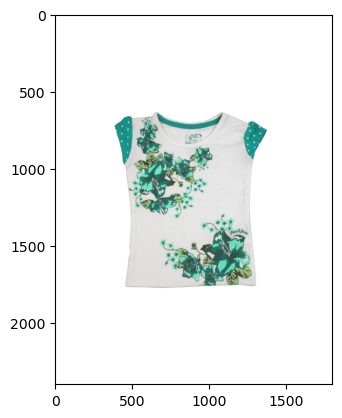

In [12]:
a = imread(dataset['ImageURL'][0])
plt.imshow(a)

In [13]:
model = ResNet50(weights = 'imagenet', input_shape = (224,224, 3), include_top = False)
model.trainable = False
model = tf.keras.Sequential([
    model, 
    GlobalMaxPooling2D()
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d_1 (Glo  (None, 2048)             0         
 balMaxPooling2D)                                                
                                                                 
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [14]:
def extract_features_from_img(img_path, model) : 
    img = imread(img_path)
    img = cv2.resize(img, (224,224))
    img = np.array(img)
    img_expanded = np.expand_dims(img, axis = 0)
    preprocessed = preprocess_input(img_expanded)
    result = model.predict(preprocessed).flatten()
    normalised = result / norm(result)
    return normalised

In [15]:
filenames = dataset['ImageURL'].to_list()

(224, 224, 3)


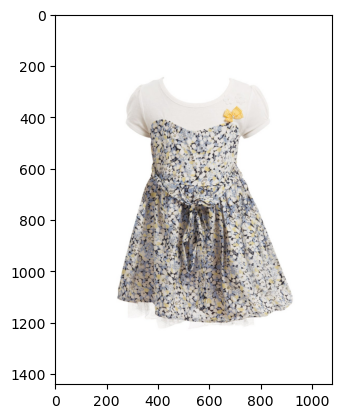

In [16]:
img = imread('http://assets.myntassets.com/v1/images/style/properties/9fa6bd6c5b841804bdee04460ee934de_images.jpg')
plt.imshow(img)
type(img)

img = cv2.resize(img, (224,224))
print(img.shape)

In [17]:
'''import tqdm
features = []
for file in filenames:
    features.append(extract_features_from_img(file, model))
print(len(features))'''


'import tqdm\nfeatures = []\nfor file in filenames:\n    features.append(extract_features_from_img(file, model))\nprint(len(features))'

In [18]:
with open('/kaggle/input/pickle-file/file.pkl', 'rb') as file :
    features = pickle.load(file)

In [19]:
'''ss = pickle.dumps(features)
with open('file.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(features, file)'''

"ss = pickle.dumps(features)\nwith open('file.pkl', 'wb') as file:\n    # A new file will be created\n    pickle.dump(features, file)"

In [20]:
from sklearn.neighbors import NearestNeighbors
neighbours = NearestNeighbors(n_neighbors = 5, algorithm = 'brute',metric = 'euclidean' )
neighbours.fit(features)

result_img = []
for feature in features : 
    distance, indices = neighbours.kneighbors([feature])
    #print(indices[0][:5][3])
    result_img.append(indices[0][:5])

[  3 224 610  53  12]


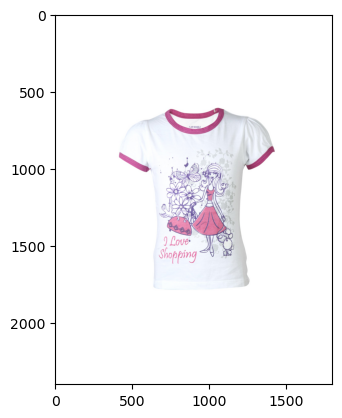

In [21]:
len(result_img)
print(result_img[3])
#for res in result_img[3]:
    #print(res)
data = dataset.loc[12]
img = imread(data['ImageURL'])
plt.imshow(img)